In [24]:
import pandas as pd
import os

# Paths
raw_path = r"C:\Users\ruham\Downloads\financial inclusion forecasting system\Financial-inclusion-forecasting-system-week10\data\raw"
file_name = "ethiopia_fi_unified_data.xlsx"

# Load Excel file
xls = pd.ExcelFile(os.path.join(raw_path, file_name))
print("Sheets in the file:", xls.sheet_names)

# Load main data sheet
df_data = pd.read_excel(xls, sheet_name='ethiopia_fi_unified_data')

# Quick overview
print(df_data.shape)
print(df_data.columns)
df_data.head()


Sheets in the file: ['ethiopia_fi_unified_data', 'Impact_sheet']
(43, 34)
Index(['record_id', 'record_type', 'category', 'pillar', 'indicator',
       'indicator_code', 'indicator_direction', 'value_numeric', 'value_text',
       'value_type', 'unit', 'observation_date', 'period_start', 'period_end',
       'fiscal_year', 'gender', 'location', 'region', 'source_name',
       'source_type', 'source_url', 'confidence', 'related_indicator',
       'relationship_type', 'impact_direction', 'impact_magnitude',
       'impact_estimate', 'lag_months', 'evidence_basis', 'comparable_country',
       'collected_by', 'collection_date', 'original_text', 'notes'],
      dtype='object')


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [26]:
# Count by record_type
print(df_data['record_type'].value_counts())

# Count by pillar
print(df_data['pillar'].value_counts())

# Count by source_type
print(df_data['source_type'].value_counts())

# Temporal range
print("Date range:", df_data['observation_date'].min(), "to", df_data['observation_date'].max())

# Unique indicators
print("Indicators:", df_data['indicator_code'].unique())


record_type
observation    30
event          10
target          3
Name: count, dtype: int64
pillar
ACCESS           16
USAGE            11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64
Date range: 2014-12-31 00:00:00 to 2030-12-31 00:00:00
Indicators: ['ACC_OWNERSHIP' 'ACC_MM_ACCOUNT' 'ACC_4G_COV' 'ACC_MOBILE_PEN'
 'ACC_FAYDA' 'USG_P2P_COUNT' 'USG_P2P_VALUE' 'USG_ATM_COUNT'
 'USG_ATM_VALUE' 'USG_CROSSOVER' 'USG_TELEBIRR_USERS' 'USG_TELEBIRR_VALUE'
 'USG_MPESA_USERS' 'USG_MPESA_ACTIVE' 'USG_ACTIVE_RATE' 'AFF_DATA_INCOME'
 'GEN_GAP_ACC' 'GEN_MM_SHARE' 'GEN_GAP_MOBILE' 'EVT_TELEBIRR'
 'EVT_SAFARICOM' 'EVT_MPESA' 'EVT_FAYDA' 'EVT_FX_REFORM' 'EVT_CROSSOVER'
 'EVT_MPESA_INTEROP' 'EVT_ETHIOPAY' 'EVT_NFIS2' 'EVT_SAFCOM_PRICE']


In [27]:
ref_file = "reference_codes.xlsx"
df_ref = pd.read_excel(os.path.join(raw_path, ref_file))
df_ref.head()


,field,code,description,applies_to
0,record_type,observation,Actual measured value from a source,All
1,record_type,event,Policy launch market event or milestone,All
2,record_type,impact_link,Relationship between event and indicator (link...,All
3,record_type,target,Policy target or official goal,All
4,record_type,baseline,Starting point for comparison,All


In [28]:
additional_file = "Additional Data Points Guide.xlsx"
xls_add = pd.ExcelFile(os.path.join(raw_path, additional_file))
print(xls_add.sheet_names)  # ['Sheet A', 'Sheet B', 'Sheet C', 'Sheet D']


['A. Alternative Baselines', 'B. Direct Corrln', 'C. Indirect Corrln', 'D. Market Naunces']


In [29]:
# Convert observation_date to datetime
df_data['observation_date'] = pd.to_datetime(df_data['observation_date'], errors='coerce')

# Ensure numeric columns
numeric_cols = ['value_numeric']
df_data[numeric_cols] = df_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Replace empty strings with NaN
df_data.replace("", pd.NA, inplace=True)

# Drop duplicates
df_data = df_data.drop_duplicates(subset=['record_id'])



In [31]:
# List of columns that must not be empty
required_cols = ['record_id', 'record_type', 'pillar', 'indicator_code', 'value_numeric', 'observation_date']

missing_counts = df_data[required_cols].isna().sum()
print("Missing values in required columns:\n", missing_counts)


Missing values in required columns:
 record_id            0
record_type          0
pillar              10
indicator_code       0
value_numeric       10
observation_date     0
dtype: int64


In [32]:
df_data = df_data.drop_duplicates(subset=['record_id'])
print("Shape after removing duplicates:", df_data.shape)


Shape after removing duplicates: (43, 34)


In [33]:
# Observations per record_type
print(df_data.groupby('record_type').size())

# Observations per pillar
print(df_data.groupby(['pillar', 'record_type']).size())

# Missing values per column
print(df_data.isna().sum())


record_type
event          10
observation    30
target          3
dtype: int64
pillar         record_type
ACCESS         observation    14
               target          2
AFFORDABILITY  observation     1
GENDER         observation     4
               target          1
USAGE          observation    11
dtype: int64
record_id               0
record_type             0
category               33
pillar                 10
indicator               0
indicator_code          0
indicator_direction    10
value_numeric          10
value_text             33
value_type              0
unit                   10
observation_date        0
period_start           33
period_end             33
fiscal_year             0
gender                  0
location                0
region                 43
source_name             0
source_type             0
source_url             12
confidence              0
related_indicator      43
relationship_type      43
impact_direction       43
impact_magnitude       43
impact_

In [34]:
# Enrich df_data using Additional Data Points Guide ---

# Ensure record_id is numeric
df_data['record_id'] = pd.to_numeric(df_data['record_id'], errors='coerce').fillna(0).astype(int)
start_id = df_data['record_id'].max() + 1

# Load all sheets with correct names
sheet_a = pd.read_excel(xls_add, sheet_name='A. Alternative Baselines')
sheet_b = pd.read_excel(xls_add, sheet_name='B. Direct Corrln')
sheet_c = pd.read_excel(xls_add, sheet_name='C. Indirect Corrln')
sheet_d = pd.read_excel(xls_add, sheet_name='D. Market Naunces')

# Helper function to create new rows
def create_new_rows(sheet, record_type, source_type, start_id):
    new_rows = []
    for i, row in sheet.iterrows():
        new_rows.append({
            'record_id': start_id,
            'record_type': record_type,
            'pillar': row.get('pillar', pd.NA),
            'indicator_code': row.get('indicator_code', pd.NA),
            'value_numeric': row.get('baseline_value', row.get('value_numeric', pd.NA)),
            'observation_date': pd.to_datetime(row.get('date', pd.NA), errors='coerce'),
            'source_type': source_type,
            'confidence': row.get('confidence', pd.NA),
            'location': row.get('location', pd.NA)
        })
        start_id += 1
    return pd.DataFrame(new_rows), start_id

# --- Enrich with each sheet ---

# Sheet A: Alternative baselines → observation
df_new_a, start_id = create_new_rows(sheet_a, 'observation', 'baseline_guide', start_id)

# Sheet B: Direct correlations → event
df_new_b, start_id = create_new_rows(sheet_b, 'event', 'direct_corr', start_id)

# Sheet C: Indirect correlations → event
df_new_c, start_id = create_new_rows(sheet_c, 'event', 'indirect_corr', start_id)

# Sheet D: Market nuances → impact_link
df_new_d, start_id = create_new_rows(sheet_d, 'impact_link', 'market_nuance', start_id)

# Concatenate all new rows together with original df_data
df_data = pd.concat([df_data, df_new_a, df_new_b, df_new_c, df_new_d], ignore_index=True)

# Final check
print("Shape after enrichment:", df_data.shape)
print(df_data['record_type'].value_counts())
df_data.tail(10)


Shape after enrichment: (131, 34)
record_type
event          63
observation    48
impact_link    17
target          3
Name: count, dtype: int64


C:\Users\ruham\AppData\Local\Temp\ipykernel_1516\4033149071.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_data = pd.concat([df_data, df_new_a, df_new_b, df_new_c, df_new_d], ignore_index=True)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
121,79,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
122,80,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
123,81,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
124,82,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
125,83,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
126,84,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
127,85,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
128,86,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
129,87,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
130,88,impact_link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [35]:
processed_path = r"C:\Users\ruham\Downloads\financial inclusion forecasting system\Financial-inclusion-forecasting-system-week10\data\processed"
os.makedirs(processed_path, exist_ok=True)

output_file = os.path.join(processed_path, "ethiopia_fi_unified_data_enriched.xlsx")
df_data.to_excel(output_file, index=False)
print(f"Enriched dataset saved to: {output_file}")


Enriched dataset saved to: C:\Users\ruham\Downloads\financial inclusion forecasting system\Financial-inclusion-forecasting-system-week10\data\processed\ethiopia_fi_unified_data_enriched.xlsx


record_type
event          63
observation    48
impact_link    17
target          3
Name: count, dtype: int64
pillar
ACCESS           16
AFFORDABILITY     1
GENDER            5
USAGE            11
Name: record_type, dtype: int64
record_id                0
record_type              0
category               121
pillar                  98
indicator               88
indicator_code          88
indicator_direction     98
value_numeric           98
value_text             121
value_type              88
unit                    98
observation_date        88
period_start           121
period_end             121
fiscal_year             88
gender                  88
location                88
region                 131
source_name             88
source_type              0
source_url             100
confidence              88
related_indicator      131
relationship_type      131
impact_direction       131
impact_magnitude       131
impact_estimate        131
lag_months             131
evidence_basis 

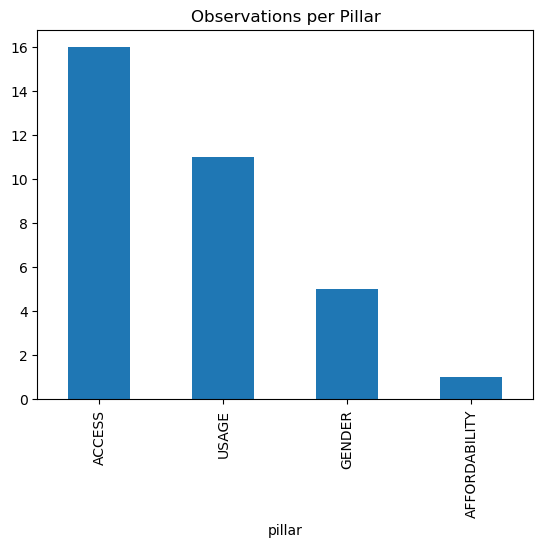

In [36]:
# Observations per record type
print(df_data['record_type'].value_counts())

# Observations per pillar
print(df_data.groupby('pillar')['record_type'].count())

# Missing values
print(df_data.isna().sum())

# Quick plot (optional)
import matplotlib.pyplot as plt

df_data['pillar'].value_counts().plot(kind='bar', title='Observations per Pillar')
plt.show()
